### Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
seaborn.set()

In [2]:
raw_data = pd.read_csv('Social_Network_Ads.csv')
raw_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
raw_data.isnull().sum()
data_processed = raw_data.drop(['Gender', 'Age', 'User ID'], axis=1)

In [4]:
inputs_df = data_processed.drop("Purchased", axis = 1)
inputs = np.asarray(inputs_df)
targets = np.asarray(data_processed['Purchased'])

inputs =StandardScaler().fit_transform(inputs)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2,  random_state=4)

In [6]:
LogReg = LogisticRegression(C = 0.01, solver='liblinear').fit(x_train, y_train)

In [7]:
yhat = LogReg.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [8]:
jaccard_score(y_test, yhat, pos_label=0)

0.8142857142857143

In [9]:
def plot_confusion_matrix(
        cm,
        classes,
        normalize = False,
        title = 'Confusion Matrix',
        cmap=plt.cm.Blues
                            ):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix : ")
    else:
        print("Confusion Matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        59
           1       0.83      0.48      0.61        21

    accuracy                           0.84        80
   macro avg       0.84      0.72      0.75        80
weighted avg       0.84      0.84      0.82        80

Confusion Matrix, without normalization
[[57  2]
 [11 10]]


C:\Users\shrin\AppData\Local\Temp\ipykernel_7920\180267494.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


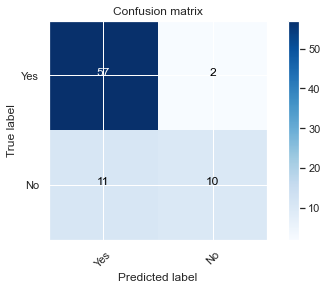

In [10]:
cm = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cm, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

In [11]:
jaccard_score(y_test, yhat, pos_label=0)

0.8142857142857143

In [12]:
LogReg.score(x_test, y_test)

0.8375